# Analysis

Observed Trend 1: 

Looking at the latitude vs. temperature plot, as the latitude increases the temperature decrease plummets, when compared to the latitude increase (through negative numbers). This is most likely related with the percentage of lands at each south ad nothern hemisphere.

Observed Trend 2: 
Looking at the “latitude vs. humidity” plot, we see that humidity (%) doesn't seem to have much correlation to latitude. Humidity inversely correlates with higher temperature as it is evident that lower latitudes are warmer and have higher humidity.

Observed Trend 3: 

No significant correlation can be found between latitude and cloud cover. Frequency of wind speed, however, can be observed. As we compare all the plots together (latitude vs. –temperature, -humidity, - cloudiness, -windspeed), 
we can conclude that latitude effects none of these variables but the temperature. 
   

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys




# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [20]:
#OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count += 1

   # Create endpoint URL with each city
   city_url = url + "&q=" + city

   # Log the url, record, and set numbers
   print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
   record_count += 1

   # Run an API request for each of the cities
   try:
       # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

       # Append the City information into city_data list
       city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
       label = ["City","Cloudiness", "Country","Date", "Max Temp", "Wind Speed","Lat","Lng", "Humidity"]

   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | along
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | udachnyy
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | turkan
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | morondava
Processing Record 16 of Set 1 | lithgow
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | turkistan
City not found. Skipping...
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | chemal
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | kra

Processing Record 184 of Set 4 | kahta
Processing Record 185 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 186 of Set 4 | wanlaweyn
Processing Record 187 of Set 4 | elliot lake
Processing Record 188 of Set 4 | nikolskoye
Processing Record 189 of Set 4 | namibe
Processing Record 190 of Set 4 | hong gai
Processing Record 191 of Set 4 | jiujiang
Processing Record 192 of Set 4 | longyearbyen
Processing Record 193 of Set 4 | almaty
Processing Record 194 of Set 4 | sungaipenuh
Processing Record 195 of Set 4 | mount isa
Processing Record 196 of Set 4 | kondoa
Processing Record 197 of Set 4 | biak
Processing Record 198 of Set 4 | sinnamary
Processing Record 199 of Set 4 | san ramon
Processing Record 200 of Set 4 | thompson
Processing Record 201 of Set 4 | berlevag
Processing Record 202 of Set 4 | kodiak
Processing Record 203 of Set 4 | waddan
Processing Record 205 of Set 5 | uinskoye
Processing Record 206 of Set 5 | mehamn
Processing Record 207 of Set 5 | narsaq
Processi

Processing Record 373 of Set 8 | berja
Processing Record 374 of Set 8 | lewistown
Processing Record 375 of Set 8 | saleaula
City not found. Skipping...
Processing Record 376 of Set 8 | zuwarah
Processing Record 377 of Set 8 | koulamoutou
Processing Record 378 of Set 8 | solnechnyy
Processing Record 379 of Set 8 | gombong
Processing Record 380 of Set 8 | hearst
Processing Record 381 of Set 8 | leningradskiy
Processing Record 382 of Set 8 | lyantonde
Processing Record 383 of Set 8 | necochea
Processing Record 384 of Set 8 | luanda
Processing Record 385 of Set 8 | palu
Processing Record 386 of Set 8 | vulcan
Processing Record 387 of Set 8 | ende
Processing Record 388 of Set 8 | kongwa
Processing Record 389 of Set 8 | el wasta
City not found. Skipping...
Processing Record 390 of Set 8 | moron
Processing Record 391 of Set 8 | fortuna
Processing Record 392 of Set 8 | abeche
Processing Record 393 of Set 8 | deputatskiy
Processing Record 394 of Set 8 | sisimiut
Processing Record 395 of Set 8 |

Processing Record 560 of Set 11 | manggar
Processing Record 562 of Set 12 | del rio
Processing Record 563 of Set 12 | coihueco
Processing Record 564 of Set 12 | baykit
Processing Record 565 of Set 12 | chiselet
Processing Record 566 of Set 12 | khudumelapye
Processing Record 567 of Set 12 | jalu
Processing Record 568 of Set 12 | halalo
City not found. Skipping...
Processing Record 569 of Set 12 | mount pleasant
Processing Record 570 of Set 12 | tipuani
Processing Record 571 of Set 12 | shetpe
Processing Record 572 of Set 12 | stoughton
Processing Record 573 of Set 12 | tiznit
Processing Record 574 of Set 12 | porosozero
Processing Record 575 of Set 12 | holovyne
Processing Record 576 of Set 12 | brownsville
Processing Record 577 of Set 12 | flinders
Processing Record 578 of Set 12 | penzance
Processing Record 579 of Set 12 | valparaiso
Processing Record 580 of Set 12 | ternate
Processing Record 581 of Set 12 | ati
Processing Record 582 of Set 12 | nago
Processing Record 583 of Set 12 |

In [35]:
city = pd.DataFrame.from_records(city_data, columns=label)

city.head()


,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,upernavik,30,GL,1556494420,20.99,7.74,72.79,-56.15,84
1,rikitea,100,PF,1556494420,73.73,26.46,-23.12,-134.97,74
2,saint george,20,GR,1556491800,48.20,3.83,39.45,22.34,81
3,albany,20,US,1556494280,50.00,9.17,42.65,-73.75,53
4,along,100,IN,1556494421,55.73,1.77,28.17,94.80,94


 Latitude vs. Temperature Plot

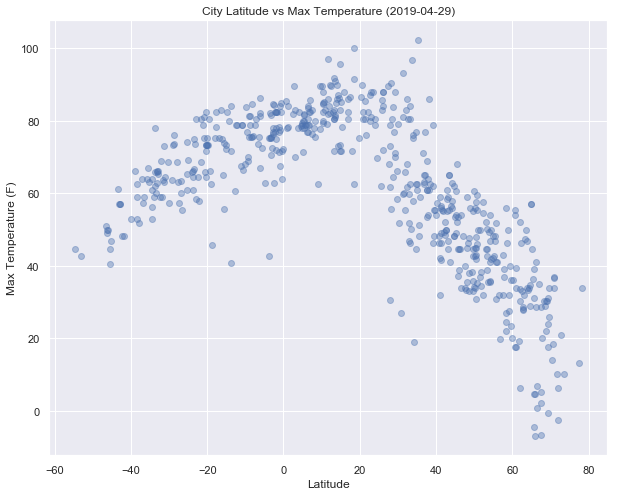

In [36]:

import seaborn as sns
from datetime import datetime
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city["Lat"], city["Max Temp"], color='b', alpha=0.4)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

Latitude vs. Humidity Plot

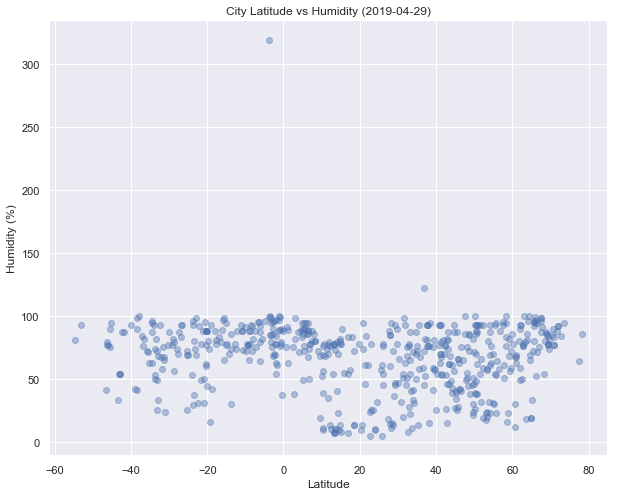

In [39]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city["Lat"], city["Humidity"], color='b', alpha=0.4)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHum.png")
plt.show()

Latitude vs. Cloudiness Plot

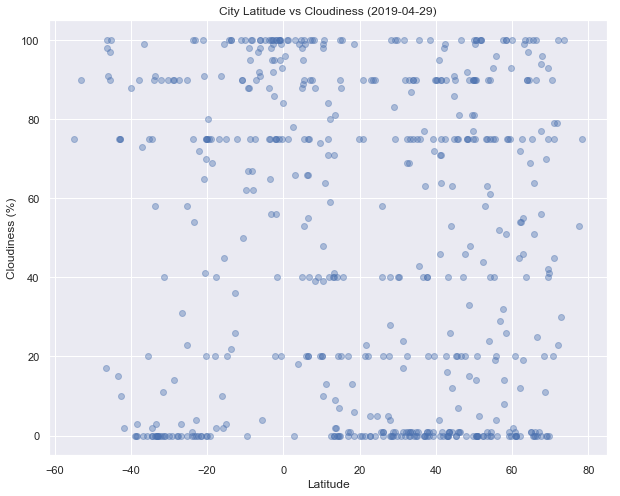

In [40]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city["Lat"], city["Cloudiness"], color='b', alpha=0.4)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloud.png")
plt.show()

Latitude vs. Wind Speed Plot

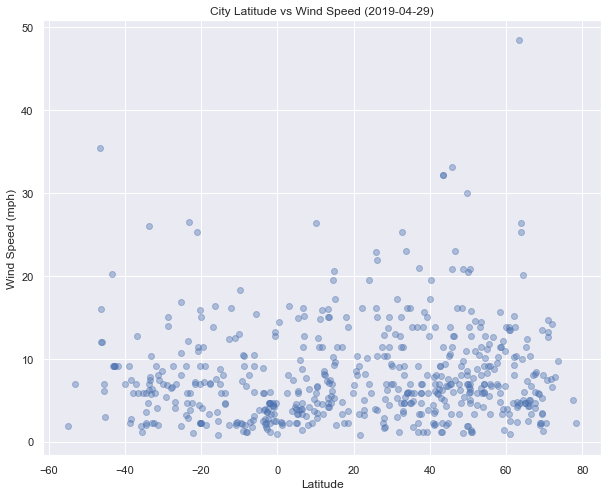

In [41]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(city["Lat"], city["Wind Speed"], color='b', alpha=0.4)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()